In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('F:\\laptop recommendation system\\price_prediction_data.csv')


In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

In [7]:
print(df.isnull().sum()/df.shape[0]*100)


Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64


In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Converting Ram into correct datatype

In [9]:
df['Ram'].value_counts()


8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')

#### Converting weight into correct data type 

In [11]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [12]:
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Creating new features

#### creating memory and memory type feature from Memory column

In [15]:
mGB=[]
mTyp=[]
for i in df['Memory']:
    v=str(i).split()
    x=v[0]
    xx=x[:len(x)-2]
    mGB.append(xx)
    if 'SSD' in v[1]  or 'HDD' in v[1] or 'Hybrid' in v[1]:
        mTyp.append(v[1])
        
    elif 'Flash' in v[1]:
        mTyp.append(v[1]+" "+v[2])


df.drop(['Memory'],axis=1,inplace=True)
df['Memory']= mGB
df['Memory_type']=mTyp
           

In [16]:
df['Memory'] = pd.to_numeric(df['Memory'], errors='coerce').astype(int)

In [17]:
#New
df['Memory_type']=df['Memory_type'].replace('Hybrid','HDD')
df['Memory_type']=df['Memory_type'].replace('Flash Storage','HDD')

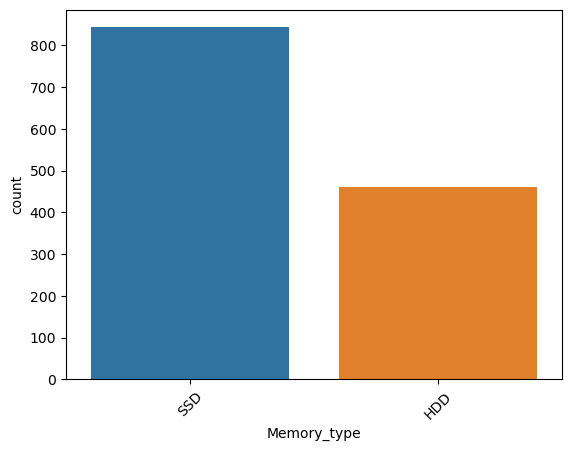

In [18]:
sns.countplot(data=df, x='Memory_type')
plt.xticks(rotation=45)
plt.show()

#### creating cpu_model_name and cpu_GHz feature from Cpu

In [19]:
cpu_model=[]
cpuGHz=[]
for i in df['Cpu']:
    v=str(i).split()
    
    v2=v[len(v)-1]
    cpuGHz.append(v2[:-3])
    v3=list(v[:-1])
    v4=''
    for j in v3:
        v4=v4+" "+j
    cpu_model.append(v4)
df.drop(['Cpu'],axis=1,inplace=True)   
df['cpu_mdl_nm']=cpu_model
df['cpu_GHz']=cpuGHz

In [20]:
df['cpu_GHz'] = df['cpu_GHz'].astype('float32')

In [21]:
#############
# reducing the unique value of cpu_mdl_nm column
############

In [22]:

for i in df['cpu_mdl_nm']:
    if 'i5' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i5')
    elif 'i7' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i7')
    elif 'i3' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i3')
    elif 'Intel' in i and 'M' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel M series process')
    
    elif 'Celeron' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Celeron series process')
    elif 'Pentium' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Pentium series process')
    elif 'A10' in i or 'A9' in i or 'A6' in i or 'A12' in i or 'A4' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'AMD A sereis Processor')
    else:
        pass
tmp=[]
for j in df['cpu_mdl_nm']:
    if j=='Intel Core i5' or j=='Intel Core i7' or j=='Intel Core i3' or j=='AMD Processor' or j=='Intel M series process' or j=='Intel Celeron series process' or j=='Intel Pentium series process':
        pass
    elif j=='AMD A sereis Processor':
        pass
    else:
        tmp.append(j)
         
for k in tmp:
    if 'AMD' in k:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'AMD  other Processor')
    elif 'Intel' in j:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'Intel other  Processor')
    else:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'Other  Processor')

In [23]:
#New

for i in df['cpu_mdl_nm']:
    if 'i5' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i5')
    elif 'i7' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i7')
    elif 'i3' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Core i3')
    elif 'Intel' in i and 'M' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel other  Processor')
    
    elif 'Celeron' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel Celeron series process')
    elif 'Pentium' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'Intel other  Processor')
    elif 'A10' in i or 'A9' in i or 'A6' in i or 'A12' in i or 'A4' in i:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(i,'AMD Processor')
    else:
        pass
tmp=[]
for j in df['cpu_mdl_nm']:
    if j=='Intel Core i5' or j=='Intel Core i7' or j=='Intel Core i3' or j=='AMD Processor' or j=='Intel M series process' or j=='Intel Celeron series process' or j=='Intel Pentium series process':
        pass
    elif j=='AMD Processor':
        pass
    else:
        tmp.append(j)
         
for k in tmp:
    if 'AMD' in k:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'AMD Processor')
    elif 'Intel' in j:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'Intel other  Processor')
    else:
        df['cpu_mdl_nm']=df['cpu_mdl_nm'].replace(k,'Other  Processor')

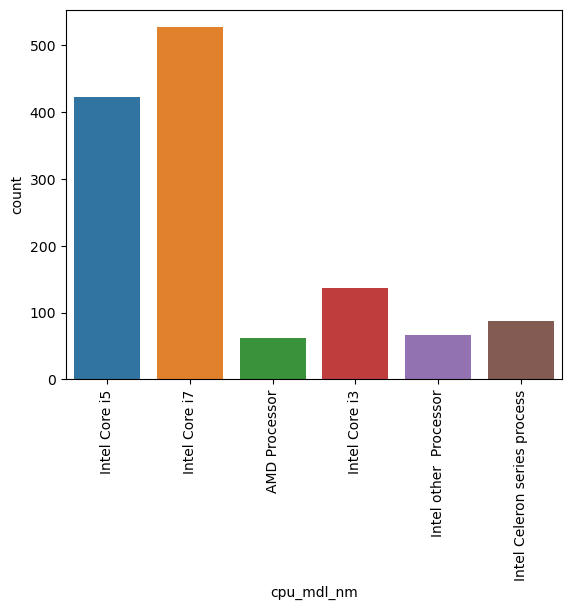

In [24]:
sns.countplot(data=df, x='cpu_mdl_nm')
plt.xticks(rotation=90)
plt.show()

#### creating screen resolution x, y and screen type and touch screen features from ScreenResolution column

In [25]:
scrn_resu_x=[]
scrn_resu_y=[]
screenTyp=[]
touchSCRN=[]
for i in df['ScreenResolution']:
    v=str(i).split()
    if len(v)>1:
        xc=v[len(v)-1].split('x')
        scrn_resu_x.append(xc[0])
        scrn_resu_y.append(xc[1])
    elif len(v)==1:
        if v[0][0].isdigit():
            xc2=v[len(v)-1].split('x')
            scrn_resu_x.append(xc2[0])
            scrn_resu_y.append(xc2[1])
            
        else:
            scrn_res.append(None)
    else:
        pass
    if v[0][0]=="I":
        screenTyp.append(v[0])
    elif v[0][0]=='F':
        screenTyp.append(v[0]+" "+"HD")
    else:
        screenTyp.append(None)
        
    if 'Touchscreen' in v:
        touchSCRN.append(1)
    else:
        touchSCRN.append(0)
df.drop(['ScreenResolution'],axis=1,inplace=True)
df['screen_typ']=screenTyp 
df['scrn_reslu_x']=scrn_resu_x
df['scrn_reslu_y']=scrn_resu_y       
df['touch_display']=touchSCRN

In [26]:
df['scrn_reslu_x'] = pd.to_numeric(df['scrn_reslu_x'], errors='coerce').astype(int)
df['scrn_reslu_y'] = pd.to_numeric(df['scrn_reslu_y'], errors='coerce').astype(int)

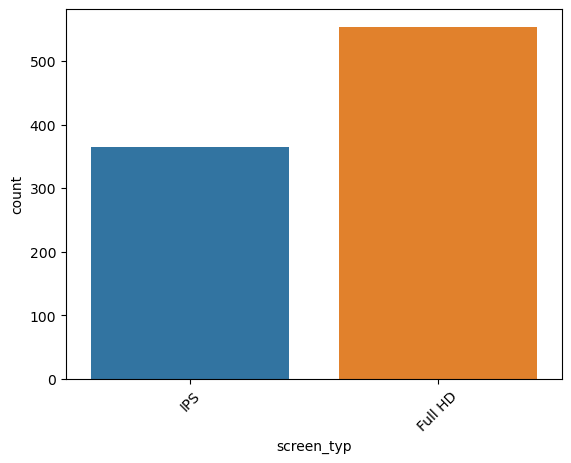

In [27]:
sns.countplot(data=df, x='screen_typ')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['screen_typ']=df['screen_typ'].fillna("IPS")

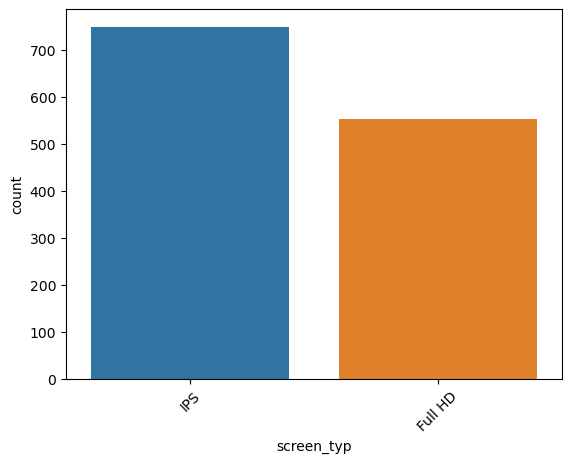

In [29]:
sns.countplot(data=df, x='screen_typ')
plt.xticks(rotation=45)
plt.show()

#### creating ppi column using scrn_reslu_y, scrn_reslu_x and Inches columns

In [30]:
df['ppi'] = (((df['scrn_reslu_x']**2) + (df['scrn_reslu_y']**2))**0.5/df['Inches']).astype('float')

In [31]:
df.drop(columns=['Inches','scrn_reslu_x','scrn_reslu_y'],inplace=True)

#### creating gpu brand name from Gpu column

In [32]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [33]:
df.drop(['Gpu'],axis=1,inplace=True)

In [34]:
#new
df.drop(index=1191, inplace=True)
df.reset_index(drop=True, inplace=True)

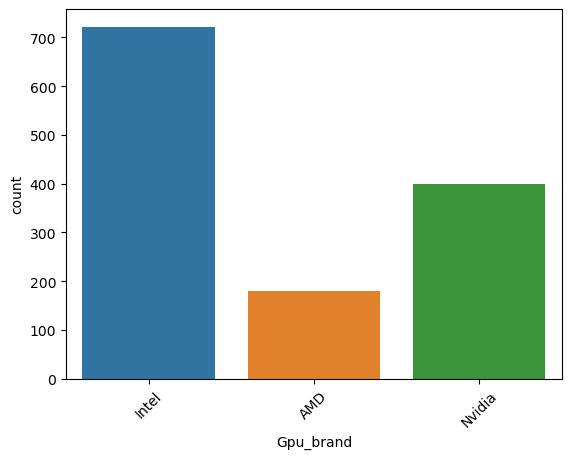

In [35]:
sns.countplot(data=df, x='Gpu_brand')
plt.xticks(rotation=45)
plt.show()

In [36]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Memory,Memory_type,cpu_mdl_nm,cpu_GHz,screen_typ,touch_display,ppi,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,128,SSD,Intel Core i5,2.3,IPS,0,226.983005,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,128,HDD,Intel Core i5,1.8,IPS,0,127.677940,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,256,SSD,Intel Core i5,2.5,Full HD,0,141.211998,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,512,SSD,Intel Core i7,2.7,IPS,0,220.534624,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,256,SSD,Intel Core i5,3.1,IPS,0,226.983005,Intel


#### creating os feature usinng OpSys column

In [37]:
os=[]
for i in df['OpSys']:
    v=str(i).split()
    if len(v)==1:
        os.append(v[0])
    elif len(v)==2 and ('Windows' in v or "Chrome" in v):
        os.append('Windows')
    elif len(v)==2 and 'No' in v:
        os.append('Others')
    elif len(v)==3 and 'Mac' in v:
        os.append('macOS')
    elif len(v)==3 and 'Windows' in v:
        os.append('Windows')
    else:
        pass
df.drop(['OpSys'],axis=1,inplace=True)
df['OS']=os

In [38]:
#New
df['OS']=df['OS'].replace('macOS','Others')
df['OS']=df['OS'].replace('Linux','Others')
df['OS']=df['OS'].replace('Android','Others')

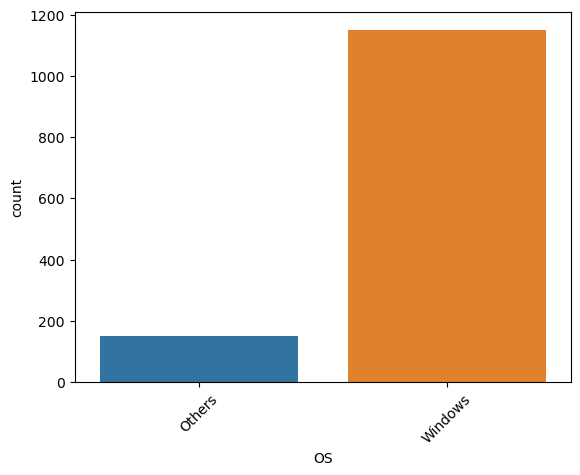

In [39]:
sns.countplot(data=df, x='OS')
plt.xticks(rotation=45)
plt.show()

In [40]:
'''
df['OS']=df['OS'].replace('Android','Others')
df['OS']=df['OS'].replace('Linux','Others')
'''

"\ndf['OS']=df['OS'].replace('Android','Others')\ndf['OS']=df['OS'].replace('Linux','Others')\n"

#### Replacing wrong type name value with correct one

In [41]:
df['TypeName']=df['TypeName'].replace('Netbook','Notebook')
df['TypeName']=df['TypeName'].replace('2 in 1 Convertible','Others')
df['TypeName']=df['TypeName'].replace('Workstation','Others')
df['TypeName']=df['TypeName'].replace('Gaming','Others')

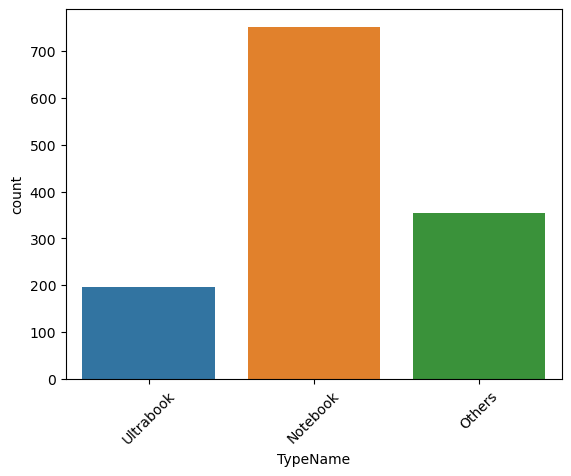

In [42]:
sns.countplot(data=df, x='TypeName')
plt.xticks(rotation=45)
plt.show()

#### Replacing some not popular company  name value with another value

In [43]:
df['Company']=df['Company'].replace('Chuwi','Others')
df['Company']=df['Company'].replace('Xiaomi','Others')
df['Company']=df['Company'].replace('Vero','Others')
df['Company']=df['Company'].replace('Razer','Others')
df['Company']=df['Company'].replace('Mediacom','Others')
df['Company']=df['Company'].replace('Fujitsu','Others')
df['Company']=df['Company'].replace('LG','Others')
df['Company']=df['Company'].replace('Google','Others')
df['Company']=df['Company'].replace('Samsung','Others')
df['Company']=df['Company'].replace('Microsoft','Others')
df['Company']=df['Company'].replace('Huawei','Others')
df['Company']=df['Company'].replace('MSI','Others')
df['Company']=df['Company'].replace('Toshiba','Others')
df['Company']=df['Company'].replace('Apple','Others')

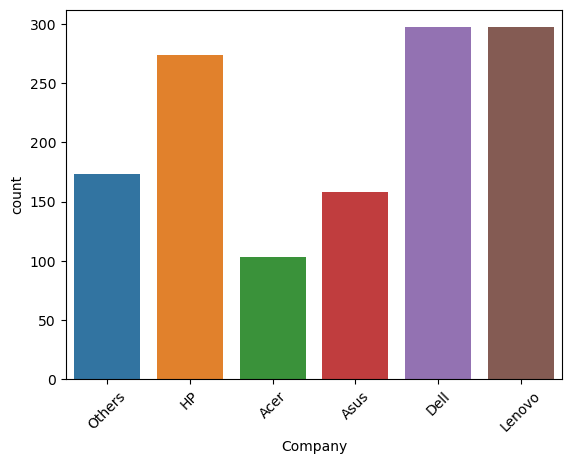

In [44]:
sns.countplot(data=df, x='Company')
plt.xticks(rotation=45)
plt.show()

In [45]:
df.head()

,Company,TypeName,Ram,Weight,Price,Memory,Memory_type,cpu_mdl_nm,cpu_GHz,screen_typ,touch_display,ppi,Gpu_brand,OS
0,Others,Ultrabook,8,1.37,71378.6832,128,SSD,Intel Core i5,2.3,IPS,0,226.983005,Intel,Others
1,Others,Ultrabook,8,1.34,47895.5232,128,HDD,Intel Core i5,1.8,IPS,0,127.677940,Intel,Others
2,HP,Notebook,8,1.86,30636.0000,256,SSD,Intel Core i5,2.5,Full HD,0,141.211998,Intel,Others
3,Others,Ultrabook,16,1.83,135195.3360,512,SSD,Intel Core i7,2.7,IPS,0,220.534624,AMD,Others
4,Others,Ultrabook,8,1.37,96095.8080,256,SSD,Intel Core i5,3.1,IPS,0,226.983005,Intel,Others


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   Memory         1302 non-null   int32  
 6   Memory_type    1302 non-null   object 
 7   cpu_mdl_nm     1302 non-null   object 
 8   cpu_GHz        1302 non-null   float32
 9   screen_typ     1302 non-null   object 
 10  touch_display  1302 non-null   int64  
 11  ppi            1302 non-null   float64
 12  Gpu_brand      1302 non-null   object 
 13  OS             1302 non-null   object 
dtypes: float32(2), float64(2), int32(2), int64(1), object(7)
memory usage: 122.2+ KB


In [47]:
print(df.isnull().sum()/df.shape[0]*100)


Company          0.0
TypeName         0.0
Ram              0.0
Weight           0.0
Price            0.0
Memory           0.0
Memory_type      0.0
cpu_mdl_nm       0.0
cpu_GHz          0.0
screen_typ       0.0
touch_display    0.0
ppi              0.0
Gpu_brand        0.0
OS               0.0
dtype: float64


In [48]:
df.head()

,Company,TypeName,Ram,Weight,Price,Memory,Memory_type,cpu_mdl_nm,cpu_GHz,screen_typ,touch_display,ppi,Gpu_brand,OS
0,Others,Ultrabook,8,1.37,71378.6832,128,SSD,Intel Core i5,2.3,IPS,0,226.983005,Intel,Others
1,Others,Ultrabook,8,1.34,47895.5232,128,HDD,Intel Core i5,1.8,IPS,0,127.677940,Intel,Others
2,HP,Notebook,8,1.86,30636.0000,256,SSD,Intel Core i5,2.5,Full HD,0,141.211998,Intel,Others
3,Others,Ultrabook,16,1.83,135195.3360,512,SSD,Intel Core i7,2.7,IPS,0,220.534624,AMD,Others
4,Others,Ultrabook,8,1.37,96095.8080,256,SSD,Intel Core i5,3.1,IPS,0,226.983005,Intel,Others


In [49]:
df['OS'].unique()

array(['Others', 'Windows'], dtype=object)

# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ram', ylabel='Density'>

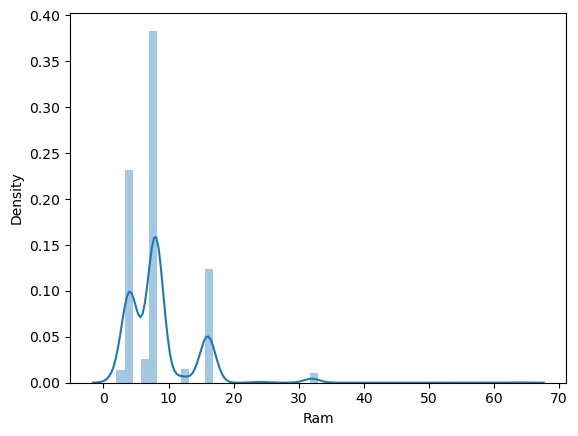

In [50]:
sns.distplot(df['Ram'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

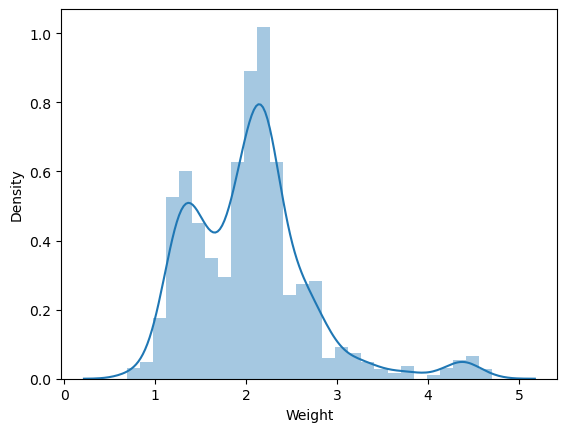

In [51]:
sns.distplot(df['Weight'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Memory', ylabel='Density'>

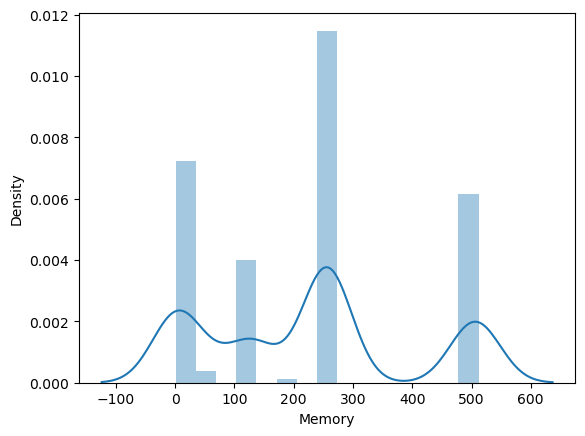

In [52]:
sns.distplot(df['Memory'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_GHz', ylabel='Density'>

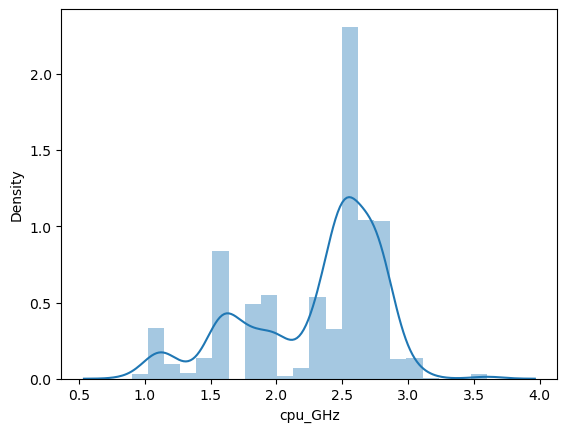

In [53]:
sns.distplot(df['cpu_GHz'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='touch_display', ylabel='Density'>

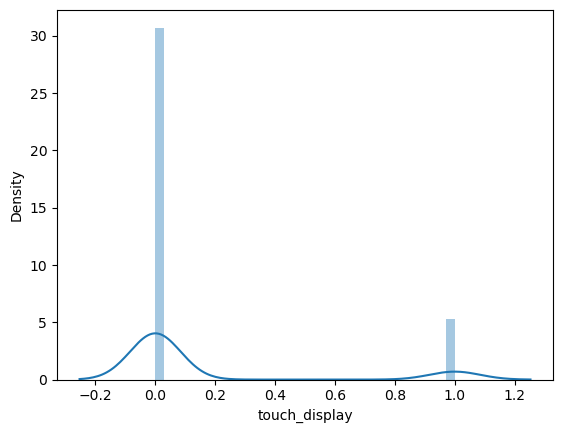

In [54]:
sns.distplot(df['touch_display'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ppi', ylabel='Density'>

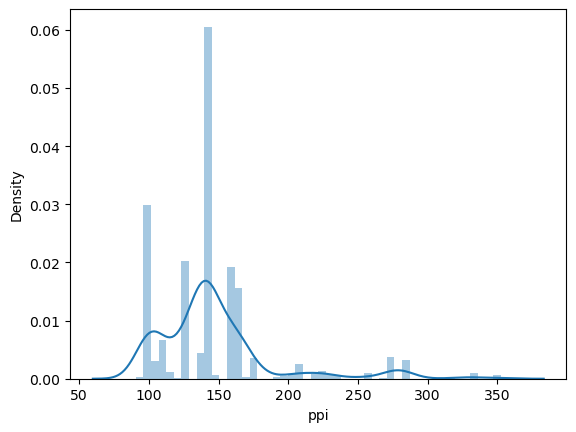

In [55]:
sns.distplot(df['ppi'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

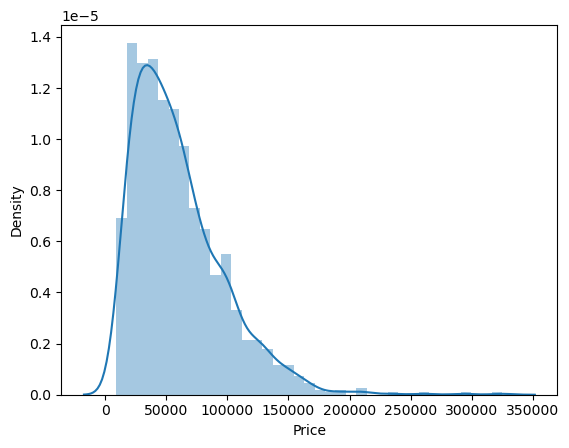

In [56]:
sns.distplot(df['Price'])

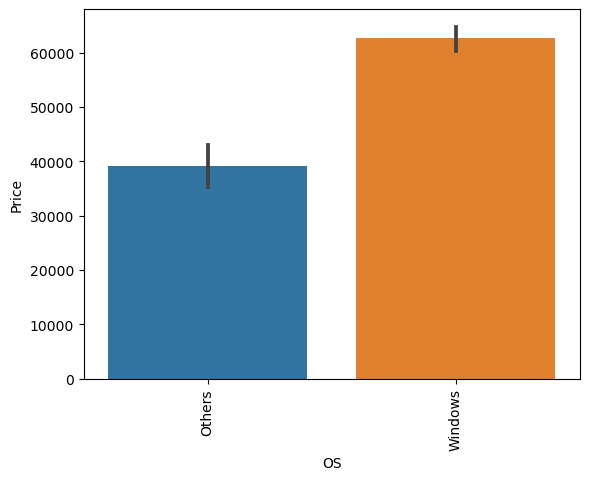

In [57]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

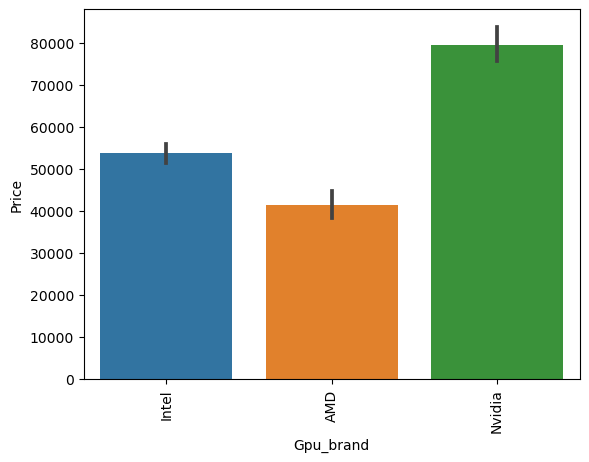

In [58]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

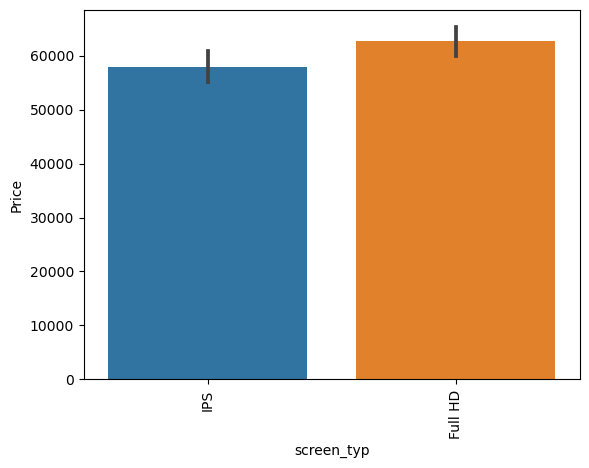

In [59]:
sns.barplot(x=df['screen_typ'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

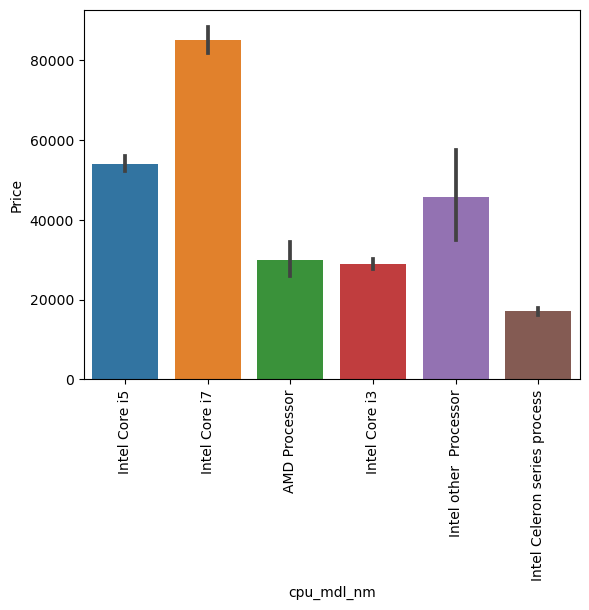

In [60]:
sns.barplot(x=df['cpu_mdl_nm'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

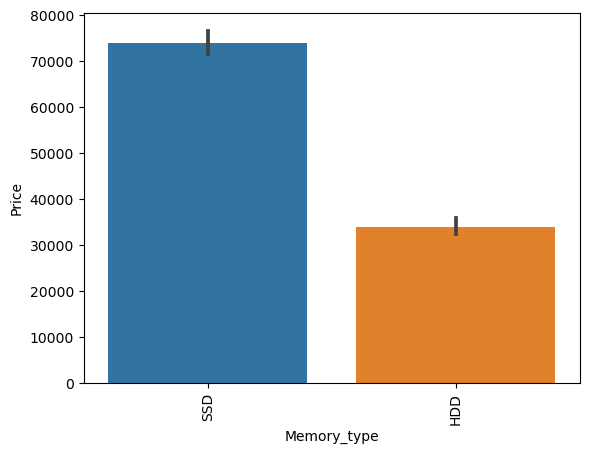

In [61]:
sns.barplot(x=df['Memory_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

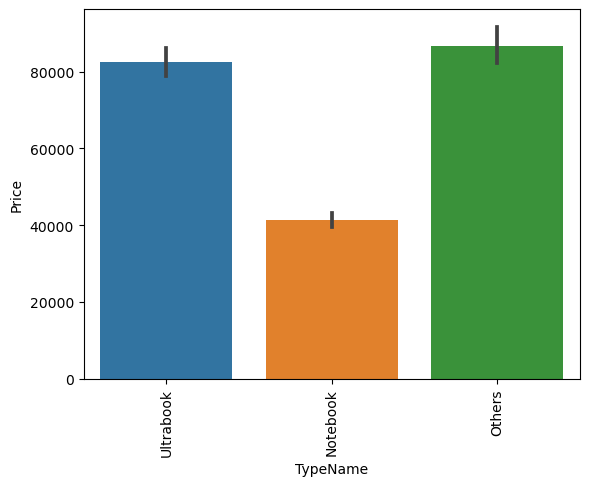

In [62]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

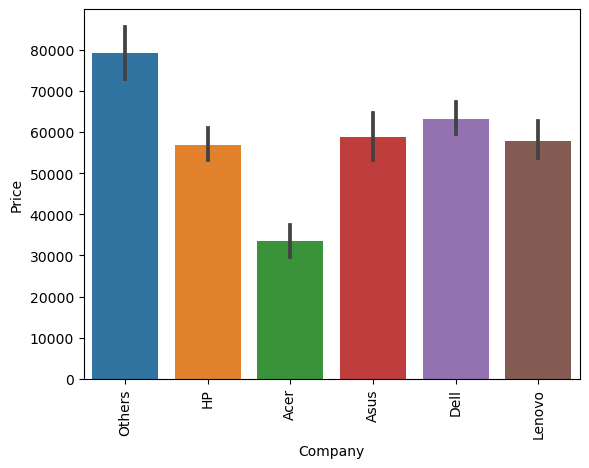

In [63]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   Memory         1302 non-null   int32  
 6   Memory_type    1302 non-null   object 
 7   cpu_mdl_nm     1302 non-null   object 
 8   cpu_GHz        1302 non-null   float32
 9   screen_typ     1302 non-null   object 
 10  touch_display  1302 non-null   int64  
 11  ppi            1302 non-null   float64
 12  Gpu_brand      1302 non-null   object 
 13  OS             1302 non-null   object 
dtypes: float32(2), float64(2), int32(2), int64(1), object(7)
memory usage: 122.2+ KB


<AxesSubplot:xlabel='ppi', ylabel='Price'>

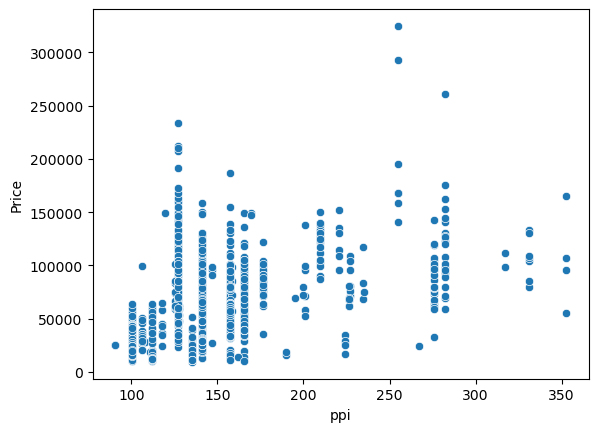

In [65]:
sns.scatterplot(x=df['ppi'],y=df['Price'])

<AxesSubplot:xlabel='cpu_GHz', ylabel='Price'>

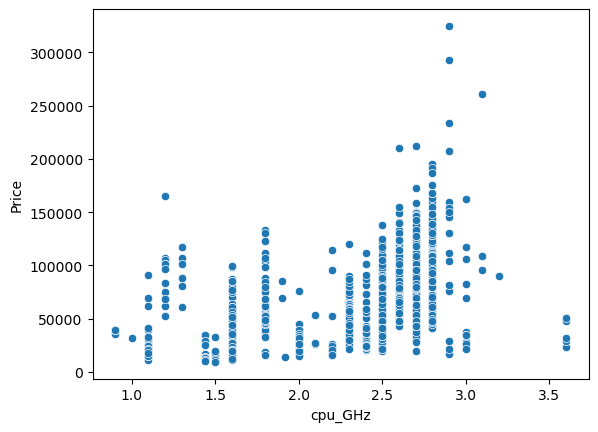

In [66]:
sns.scatterplot(x=df['cpu_GHz'],y=df['Price'])

<AxesSubplot:xlabel='Memory', ylabel='Price'>

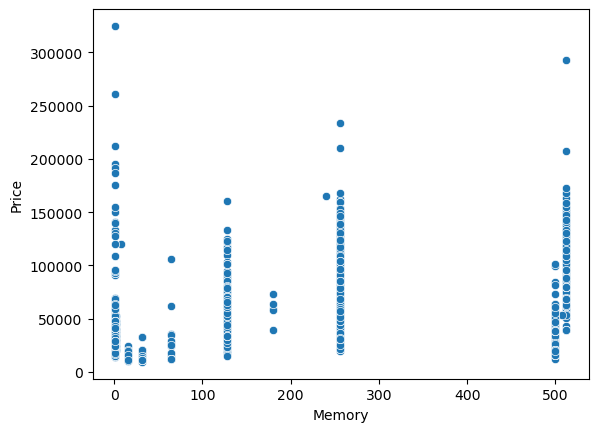

In [67]:
sns.scatterplot(x=df['Memory'],y=df['Price'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

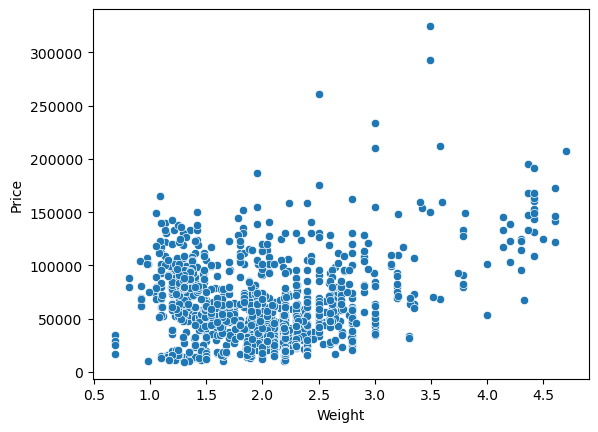

In [68]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [69]:
df.to_csv("csv save data.csv")

# Removing outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

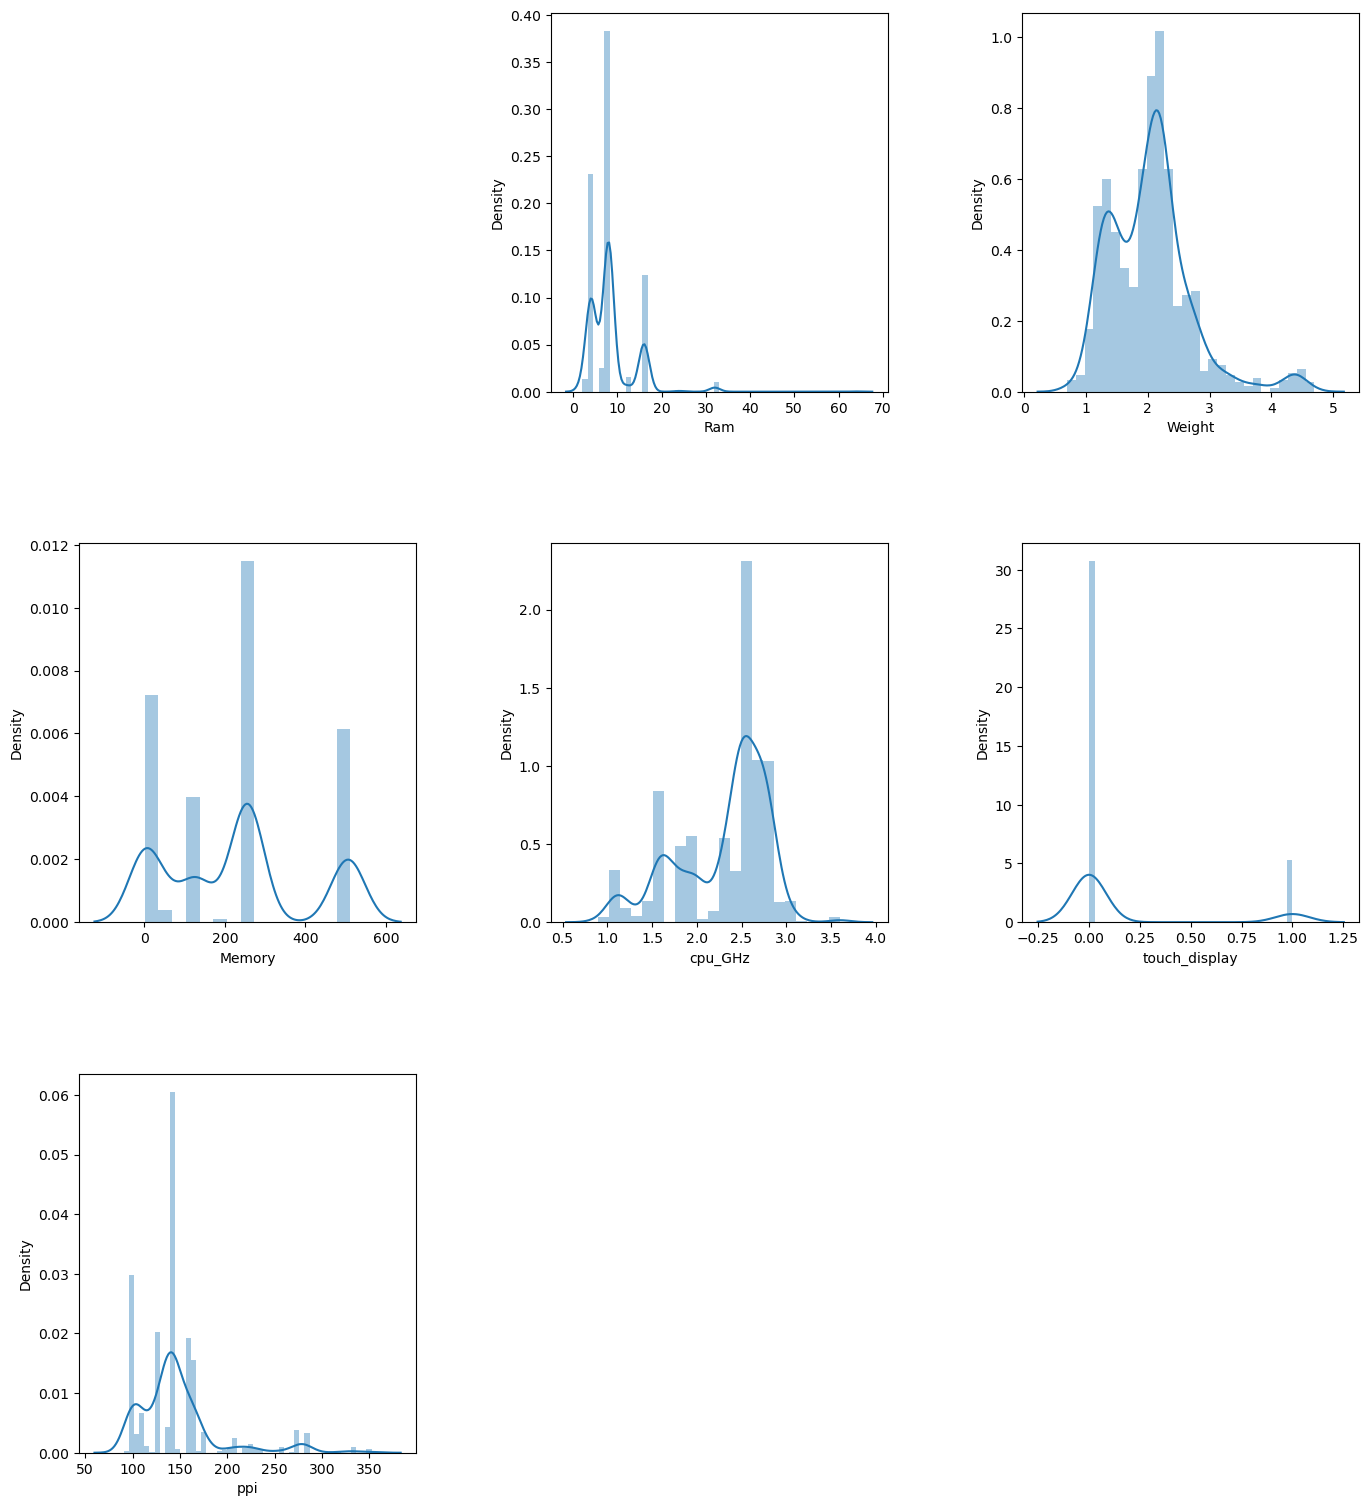

In [70]:

#******** distplot for see the distribution *******

plt.subplot(3,3,2)
sns.distplot(df["Ram"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,3)
sns.distplot(df["Weight"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,4)
sns.distplot(df["Memory"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,5)
sns.distplot(df["cpu_GHz"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,6)
sns.distplot(df["touch_display"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,7)
sns.distplot(df["ppi"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

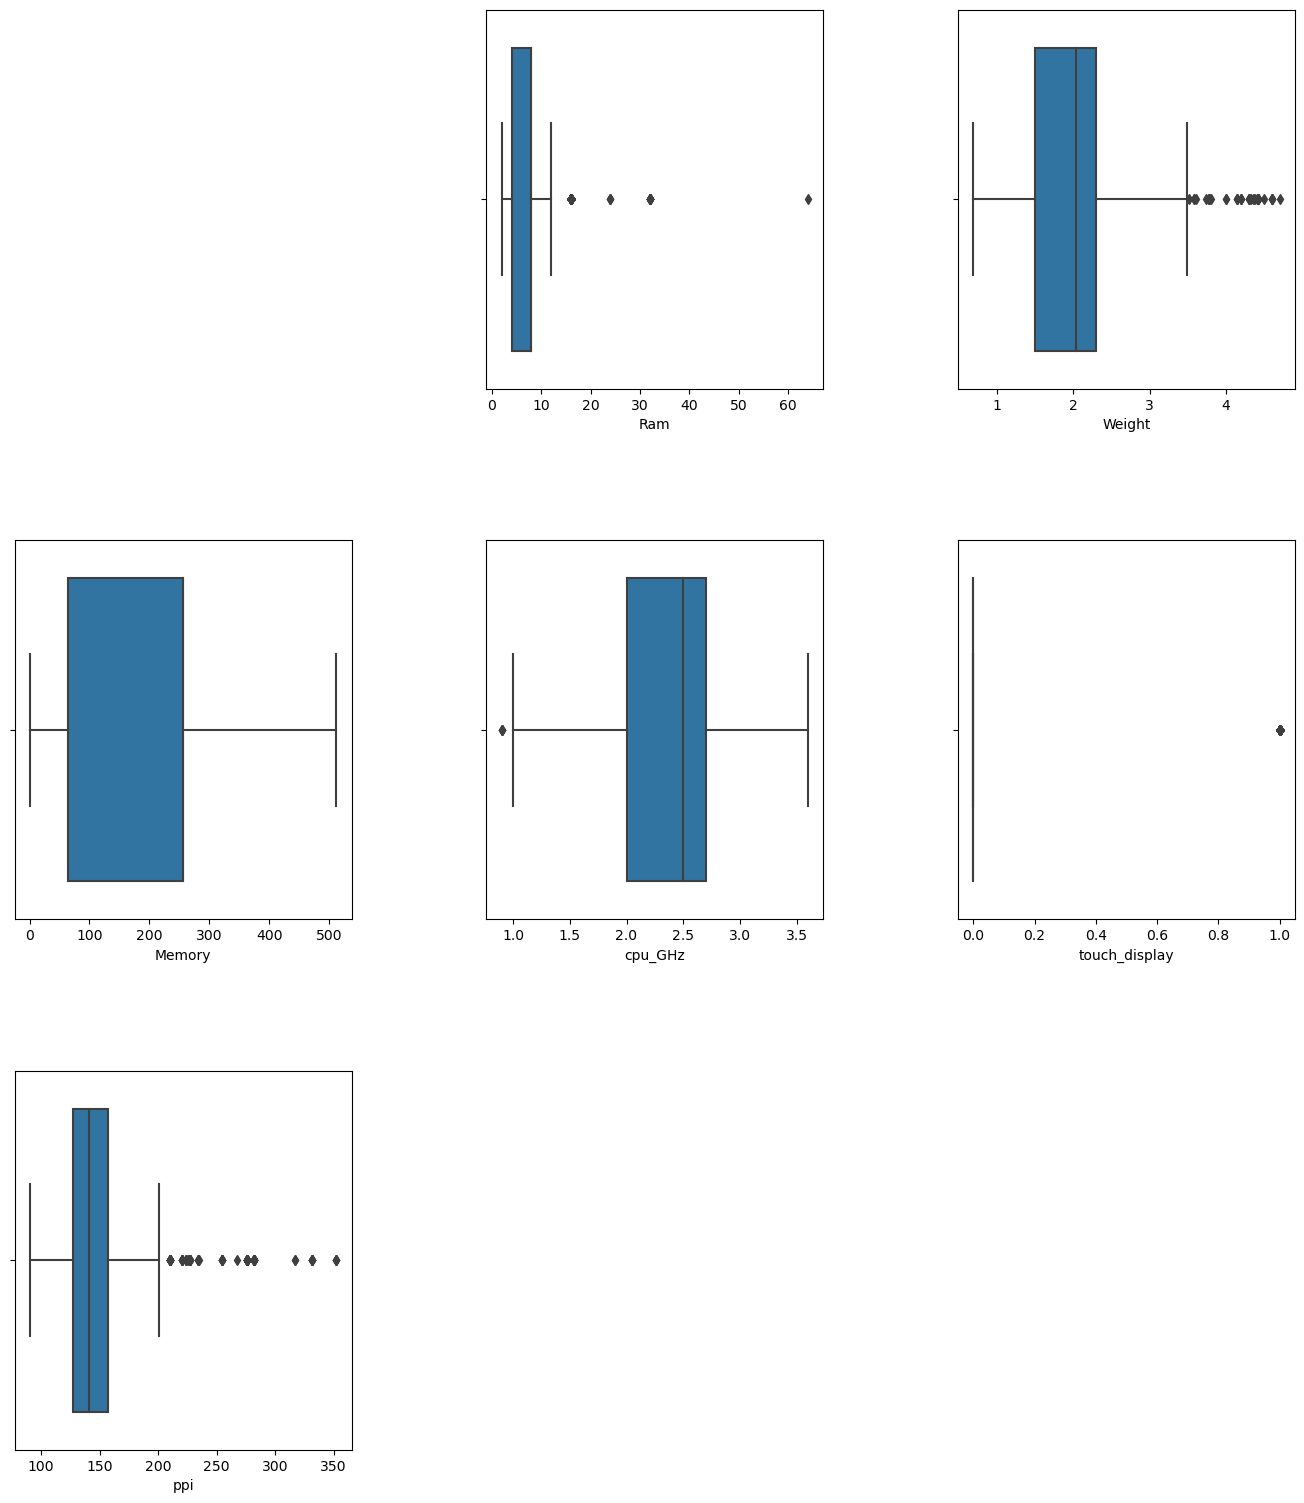

In [71]:
plt.subplot(3,3,2)
sns.boxplot(df["Ram"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,3)
sns.boxplot(df["Weight"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,4)
sns.boxplot(df["Memory"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,5)
sns.boxplot(df["cpu_GHz"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,6)
sns.boxplot(df["touch_display"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,7)
sns.boxplot(df["ppi"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)


In [72]:
data=df["Ram"]
for lk6 in range(len(data)):
    if data[lk6]>14.0:
        df["Ram"].replace(data[lk6],14.0,inplace=True)
    else:
        pass

data=df["Weight"]
data=df["Memory"]
data=df["cpu_GHz"]
data=df["touch_display"]
for lk6 in range(len(data)):
    if data[lk6]>0.0:
        df["touch_display"].replace(data[lk6],0.0,inplace=True)
    else:
        pass

data=df["ppi"]
for lk6 in range(len(data)):
    if data[lk6]>202.3727685149923:
        df["ppi"].replace(data[lk6],202.3727685149923,inplace=True)
    else:
        pass

row_drp_rmv_outl=[258, 901, 650, 780, 781, 530, 659, 788, 1047, 1048, 1061, 1189, 424, 552, 810, 939, 1066, 1196, 177, 818, 1077, 1081, 955, 577, 578, 456, 585, 586, 841, 968, 972, 1099, 723, 468, 730, 603, 1116, 1119, 224, 1255, 238, 494, 1138, 758, 247, 251]
df=df.drop(row_drp_rmv_outl).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

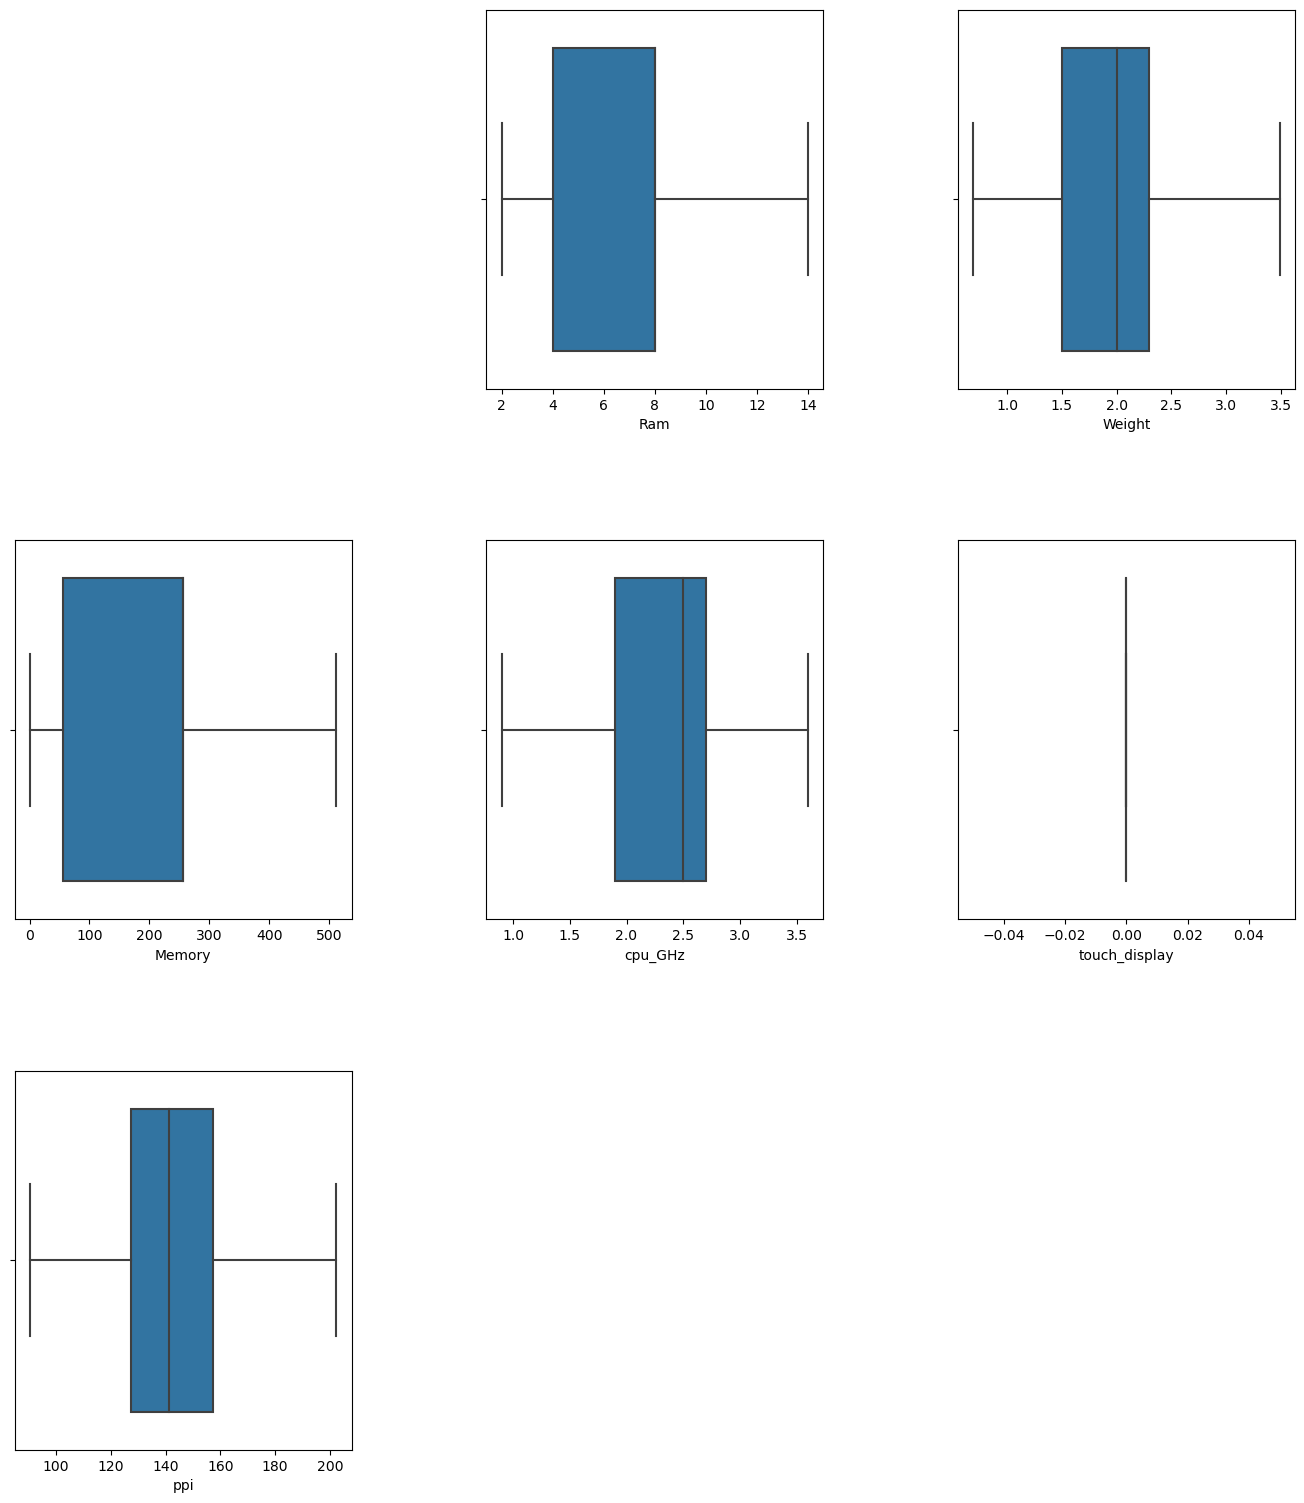

In [73]:
plt.subplot(3,3,2)
sns.boxplot(df["Ram"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,3)
sns.boxplot(df["Weight"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,4)
sns.boxplot(df["Memory"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,5)
sns.boxplot(df["cpu_GHz"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,6)
sns.boxplot(df["touch_display"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)

plt.subplot(3,3,7)
sns.boxplot(df["ppi"])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)


# Encoding

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

allCatCol=list(df.select_dtypes(include="object").columns)

categorical_column=None

categorical_column=['Company', 'TypeName', 'Memory_type', 'cpu_mdl_nm', 'screen_typ', 'Gpu_brand', 'OS']

df["TypeName"]=df["TypeName"].map({'Ultrabook': 0, 'Notebook': 1, 'Others': 2})

df["Memory_type"]=df["Memory_type"].map({'SSD': 0, 'HDD': 1})


df["screen_typ"]=df["screen_typ"].map({'IPS': 0, 'Full HD': 1})

df["Gpu_brand"]=df["Gpu_brand"].map({'Intel': 0, 'AMD': 1, 'Nvidia': 2})

df["OS"]=df["OS"].map({'Others': 0, 'Windows': 1})

encoding= OneHotEncoder(sparse=False)
#*********** Performing one-Hot encoding ************
result_encod=encoding.fit_transform(df[['Company', 'cpu_mdl_nm']])
dataFrame_encode_col=pd.DataFrame(result_encod,columns=['Company_Acer', 'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo', 'Company_Others', 'cpu_mdl_nm_AMD Processor', 'cpu_mdl_nm_Intel Celeron series process', 'cpu_mdl_nm_Intel Core i3', 'cpu_mdl_nm_Intel Core i5', 'cpu_mdl_nm_Intel Core i7', 'cpu_mdl_nm_Intel other  Processor'])
numeric_col=df[['TypeName', 'Ram', 'Weight', 'Price', 'Memory', 'Memory_type', 'cpu_GHz', 'screen_typ', 'touch_display', 'ppi', 'Gpu_brand', 'OS']]
final_dataset=pd.merge(dataFrame_encode_col,numeric_col,left_index=True,right_index=True)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
x=final_dataset.drop(['Price'], axis=1)
y=final_dataset['Price']

In [76]:
############################################################################
#**************** Separating Data into train and test data *****************
############################################################################

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)
#Change the random_state parameter value. It can change the accuracy






In [84]:
x.head()

,Company_Acer,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_Others,cpu_mdl_nm_AMD Processor,cpu_mdl_nm_Intel Celeron series process,cpu_mdl_nm_Intel Core i3,cpu_mdl_nm_Intel Core i5,...,Ram,Weight,Memory,Memory_type,cpu_GHz,screen_typ,touch_display,ppi,Gpu_brand,OS
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,1.37,128,0,2.3,0,0,202.372769,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,1.34,128,1,1.8,0,0,127.677940,0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8,1.86,256,0,2.5,1,0,141.211998,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,14,1.83,512,0,2.7,0,0,202.372769,1,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,1.37,256,0,3.1,0,0,202.372769,0,0


In [85]:
v=[hp,acer,aus,dell,lenevo,others,lp_type,
            ram,weight,memory,m_type,intel_core_i5,intel_core_i7,
            intel_core_i3,intel_celeron_series_process,amd_processor,
            intel_other_processor,cpu_ghz,scr_type,touc_dis,ppi,gpuBrnd,os_nm
            ]
print(len(v))

NameError: name 'hp' is not defined

In [88]:
############################################################################
#****************************** model training *****************************
############################################################################

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgbtd=xgb.predict(x_test)
print('r2 score',r2_score(y_test,xgbtd))

r2 score 0.8518546081390002


In [92]:
import joblib

In [90]:
xgb.save_model('xboostb.model')

In [94]:
joblib.dump(xgb, 'xgboost_model.joblib')

['xgboost_model.joblib']